In [115]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, ToktokTokenizer
import re
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
res = pd.read_csv(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\Restaurants_Train_v2.csv")
is_unique = ~res['id'].duplicated(keep='first')

# Use the boolean mask to filter the DataFrame
unique_rows = res[is_unique]
res['Aspect Term'] = res['Aspect Term'].str.lower()

s = unique_rows['Sentence']
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = word_tokenize
custom_spellchecker = SpellChecker()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



def preprocess_text(text):
    text = text.lower()
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    return text
s['clean_text'] = s.apply(preprocess_text)
data = s['clean_text']

# Specify the file path where you want to save the text file
output_file_path = "data_ready.txt"

# Open the file in write mode and write each processed document on a new line
#with open(output_file_path, "w", encoding="utf-8") as output_file:
 #   for document in data:
  #      processed_text = " ".join(document)  # Join the words in the document list
  #      if processed_text.strip():  # Check if the processed text has content
   #         output_file.write(processed_text + "\n")  # Write the processed text to the file

#print("Data has been exported to", output_file_path)

# Open the file for writing
with open(output_file_path, 'w') as file:
    # Write each value from the 'Sentence' column to the file, one value per line
    for term in data:
        file.write(str(term) + '\n')


C:\Users\jduto\AppData\Local\Temp\ipykernel_20716\516484554.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)
C:\Users\jduto\AppData\Local\Temp\ipykernel_20716\516484554.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)


In [116]:
len(unique_rows['Aspect Term'].unique())

773

In [117]:
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for document in data:
        if document.strip():
            output_file.write(document + "\n")


In [137]:
# Load top words
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusDMM.topWords"
# Read the TXT file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t',header=None)  # Change '\t' to the actual delimiter used in your file

# Display the first few rows of the DataFrame
print(df.head())

                                                   0
0  love food place quite expert selection bar ind...
1  dish food get taste since friendly service del...
2  wa good filet great u food like dish service w...
3  staff wa horrible u completely fair redeeming ...
4  staff wa horrible u completely fair redeeming ...


In [138]:
df[0].nunique()

644

In [139]:
# Specify the path to your text file
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusDMM.vocabulary"

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    file_contents = file.read()
dtt = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusDMM.theta"
with open(dtt, "r", encoding="utf-8") as file:
    theta_contents = file.readlines()
matrix = []

for element in theta_contents:
    # Split the element into individual values
    element_values = element.split()
    # Convert values to floats and append as a row to the matrix
    matrix.append([float(value) for value in element_values])

# Convert the matrix to a NumPy array for further manipulation if needed
matrix_array = np.array(matrix, dtype=float)




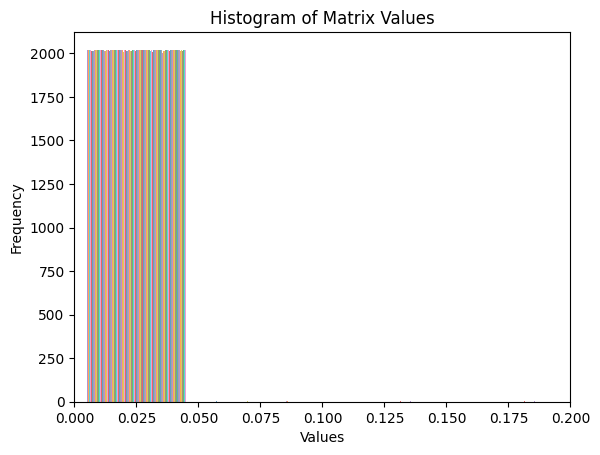

In [140]:
import matplotlib.pyplot as plt


# Create a histogram with 20 bins
plt.hist(matrix_array, bins=20, alpha=0.7)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.xlim(0, 0.2)  # Specify the x-axis limits (min, max)
#plt.ylim(0, 50)  # Specify the y-axis limits (min, max)

# Show the histogram
plt.show()

In [141]:
import numpy as np

# Assuming doc_topic_matrix is your document-to-topic matrix
# Each row represents a document, and each column represents a topic
# threshold is the value above which a topic is considered allocated to a document

def allocate_topics(doc_topic_matrix, threshold):
    allocated_topics = []

    for doc_id, doc_topics in enumerate(doc_topic_matrix):
        assigned_topics = [topic_id for topic_id, topic_prob in enumerate(doc_topics) if topic_prob > threshold]
        allocated_topics.append(assigned_topics)

    return allocated_topics


threshold = 0.01
allocated_topics = allocate_topics(matrix_array, threshold)




In [145]:
import numpy as np

# Assuming matrix_array is already defined

# Target threshold for cumulative probabilities
target_threshold = 0.8

# List to store selected indices for each row
all_selected_indices = []

for row_index in range(matrix_array.shape[0]):
    # Select the row for which you want to find the indices
    arr = matrix_array[row_index]

    # Sort the indices based on probabilities
    sorted_indices = np.argsort(arr)

    # Find the indices whose probabilities add up to the target threshold
    cumulative_sum = 0
    selected_indices = []

    for index in sorted_indices[::-1]:
        cumulative_sum += arr[index]
        selected_indices.append(index)

        if cumulative_sum >= target_threshold:
            break

    all_selected_indices.append(selected_indices)

# Convert the list of lists to a NumPy array if needed
all_selected_indices_array = np.array(all_selected_indices, dtype=object)




In [146]:
import numpy as np

def group_sentences_by_topics(all_selected_indices_array):
    grouped_sentences = {}

    for doc_index, topic_indices in enumerate(all_selected_indices_array):
        for topic_index in topic_indices:
            if topic_index not in grouped_sentences:
                grouped_sentences[topic_index] = []
            grouped_sentences[topic_index].append(doc_index)

    return grouped_sentences

# Assuming all_selected_indices_array is already defined
grouped_sentences = group_sentences_by_topics(all_selected_indices_array)


In [147]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define your stop words
stop_words = set(stopwords.words('english'))

def generate_one_word_summary_from_text(text):
    sentences = sent_tokenize(text)
    
    # Preprocess the sentences
    preprocessed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        tagged_words = pos_tag(words)  # Perform POS tagging
        nouns = [word for word, pos in tagged_words if pos.startswith('N')]  # Retain only nouns
        filtered_words = [word for word in nouns if word.isalnum() and word not in stop_words]
        preprocessed_sentences.append(filtered_words)
    
    # Calculate word frequencies
    word_frequencies = {}
    for sentence in preprocessed_sentences:
        for word in sentence:
            if word not in word_frequencies:
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    
    # Check if word_frequencies dictionary is empty
    if not word_frequencies:
        return None
    
    # Sort the word frequencies and select the most frequent word
    top_word = max(word_frequencies, key=word_frequencies.get)
    
    return top_word




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
import pandas as pd

# Create a dictionary to store occurrences of each ID along with sentences
id_occurrences = {}

# Iterate through the DataFrame
for index, row in res.iterrows():
    current_id = row['id']
    aspect_value = row['Aspect Term']
    sentence = row['Sentence']  # Assuming the column name is 'Sentence'

    # Check if the ID has occurred before
    if current_id in id_occurrences:
        # If it has occurred, append the aspect value and sentence to the list
        id_occurrences[current_id]['Aspect Values'].append(aspect_value)
        id_occurrences[current_id]['Sentences'].append(sentence)
    else:
        # If it's the first occurrence, create a new dictionary with the aspect value and sentence
        id_occurrences[current_id] = {'Aspect Values': [aspect_value], 'Sentences': [sentence]}

# Filter out IDs with only one occurrence
repeated_ids = {k: v for k, v in id_occurrences.items() if len(v['Aspect Values']) >= 1}

# Create a DataFrame with columns 'id', 'Aspect Values', and 'Sentences'
repeated_ids_df = pd.DataFrame([
    {'id': k, 'Sentences': ' '.join(v['Sentences']), 'Aspect Values': v['Aspect Values']}
    for k, v in repeated_ids.items()
])


In [149]:
# Assuming grouped_rows is already defined
# Assuming repeated_ids_df['Sentences'] contains the sentences

# Function to get a one-word summary for each topic number
def get_topic_summaries(grouped_rows, sentences_column='Sentences'):
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

    # Iterate through each topic
    for topic_id, sentence_ids in grouped_rows.items():
        # Combine sentences into one text
        sentences = [repeated_ids_df[sentences_column].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
        
        # Generate one-word summary for the topic
        summary = generate_one_word_summary_from_text(text)
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Call the function with the existing grouped_rows
topic_summaries = get_topic_summaries(grouped_sentences)



In [150]:
# Get summaries for each sublist
topic_summaries_for_documents = []

for sublist in all_selected_indices:
    # Get summaries for each topic in the sublist
    summaries_for_sublist = [topic_summaries.get(topic, 'Unknown') for topic in sublist]
    
    # Append the summaries for the sublist
    topic_summaries_for_documents.append(summaries_for_sublist)


In [151]:
# Assuming 'all_selected_indices' and 'topic_summaries' are defined
repeated_ids_df['allocated_topics'] = all_selected_indices
repeated_ids_df['topic_summaries'] = topic_summaries_for_documents

In [156]:
check = pd.DataFrame()
check['id'] = repeated_ids_df['id']
check['Sentence'] = repeated_ids_df['Sentences']
check['Actual Aspect'] = repeated_ids_df['Aspect Values']
check['Aspect Pred'] = repeated_ids_df['topic_summaries']

check['Common Elements'] = check.apply(
    lambda row: list(set(row['Actual Aspect']).intersection(row['Aspect Pred'])),
    axis=1
)

check['Accuracy'] = check.apply(
    lambda row: len(set(row['Actual Aspect']).intersection(row['Aspect Pred'])) / len(set(row['Actual Aspect'])),
    axis=1
)


In [153]:
total_accuracy = np.mean(check['Accuracy'])

print(total_accuracy)

0.2035602365637002


In [154]:

aspect_term_counts = check['Actual Aspect'].value_counts()

top_aspect_terms = aspect_term_counts.head(50).index.tolist()
# Filter the original DataFrame to include only rows with top aspect terms
test_filter = pd.DataFrame(check)
test_filter = check[check['Actual Aspect'].isin(top_aspect_terms)]
test_filter['Aspect Pred'] = check['Aspect Pred']

# Assuming 'true_labels' contains the true labels for the data
true_labels = test_filter['Actual Aspect']

# Assuming 'pred_df' contains the predicted topics for each sentence
pred_labels = test_filter['Aspect Pred'].astype(str)

total_accuracy = np.mean(test_filter['Accuracy'])

print(total_accuracy)

0.3754071661237785


C:\Users\jduto\AppData\Local\Temp\ipykernel_20716\4196203067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filter['Aspect Pred'] = check['Aspect Pred']


In [157]:
check

,id,Sentence,Actual Aspect,Aspect Pred,Common Elements,Accuracy
0,3121,But the staff was so horrible to us.,[staff],[staff],[staff],1.000000
1,2777,"To be completely fair, the only redeeming fact...",[food],[food],[food],1.000000
2,1634,"The food is uniformly exceptional, with a very...","[food, kitchen, menu]",[food],[food],0.333333
3,2846,"Not only was the food outstanding, but the lit...","[food, perks]",[food],[food],0.500000
4,1458,Our agreed favorite is the orrechiete with sau...,"[orrechiete with sausage and chicken, waiters,...",[favorite],[],0.000000
...,...,...,...,...,...,...
2016,2378,"The service was typical short-order, dinner type.",[service],[food],[],0.000000
2017,1027,"We shared a bottle of sake, an order of edamam...","[bottle of sake, edamames, sushi plate, sashimi]",[bottle],[],0.000000
2018,1735,I can't believe people complain about no chees...,[cheese sticks],[bar],[],0.000000
2019,777,"From the appetizers we ate, the dim sum and ot...","[appetizers, dim sum, foods, food]",[food],[food],0.250000
